# Why estimate $f$?

## Prediction

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

We can think of a given dataset upon which we are working as a representation of some actual phenomenon. We can imagine there to be some sort of "universal" function, $f$, that was used to generate the data, one that we can never truly know.

As data scientists, we will seek to estimate this function. We will call our estimate $\hat{f}$ ("eff hat").

## Why estimate $f$?

There are two main reasons we might want to estimate $f$ with $\hat{f}$:

- prediction
   - given some set of known inputs and known outputs, we may wish to create some function that can take a new set of inputs and predict what the output would be for these inputs
- inference
   - given some set of known inputs and (optionally) known outputs, we may wish to understand how the inputs (and outputs) interact with each other

In [2]:
%pwd

'/home/bensweeney/uclax-data-science/01-iris-03-why-estimate-f'

### What does `pwd` tell us? What does this mean in the context of a Jupyter Notebook? Why would it be important to think about this before we load a csv file?

pwd tells us the working directory that we are using; in context of a jupyter notebook, it means that it is using a directory  to store defined variables and save fiels; it's important to know this before loading an CSV file because we want to make sure we stay consistent, don't disorganize data, and want our data to show up in the right place.

In [3]:
%cd ..

/home/bensweeney/uclax-data-science


In [4]:
%ls

00-introduction/              02-iris-04-statistical-learning/
01-iris-01-introduction/      02-iris-05-sampling/
01-iris-02-numerical-python/  02-iris-06-likelihood-and-clustering/
01-iris-03-why-estimate-f/    data/


## The Iris Dataset

Let us consider the Iris dataset.

In [5]:
%ls 01-iris-02-numerical-python/

02-ipython-magic.ipynb  03-the-python-numerical-stack.ipynb  data/  src/


In [6]:
%ls 01-iris-02-numerical-python/data

iris.csv  petal_width_prediction_1_var.npy


In [39]:
%mkdir -p 01-iris-03-why-estimate-f/data 

In [40]:
%cp 01-iris-02-numerical-python/data/iris.csv 01-iris-03-why-estimate-f/data

### Copy (`cp`) the data into this project (`01-iris-03-why-estimate-f`) into a folder called `data`

### Find the iris data and update the variable below

In [46]:
IRIS_DATA_LOCATION = '01-iris-03-why-estimate-f/data/iris.csv'

In [47]:
### v--- SHHH, THERE'S A SECRET TEST HERE


In [48]:
iris_df = pd.read_csv(IRIS_DATA_LOCATION, index_col=0)

### What library did we use to load the csv? What does the argument `index_col=0` do?

Pandas was used to load the csv... 'index_col=0' says to start indexing the columns at 0 which should be the first column because python uses 0 when it starts indexing, not 1.

In [50]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Figure size 1440x720 with 0 Axes>

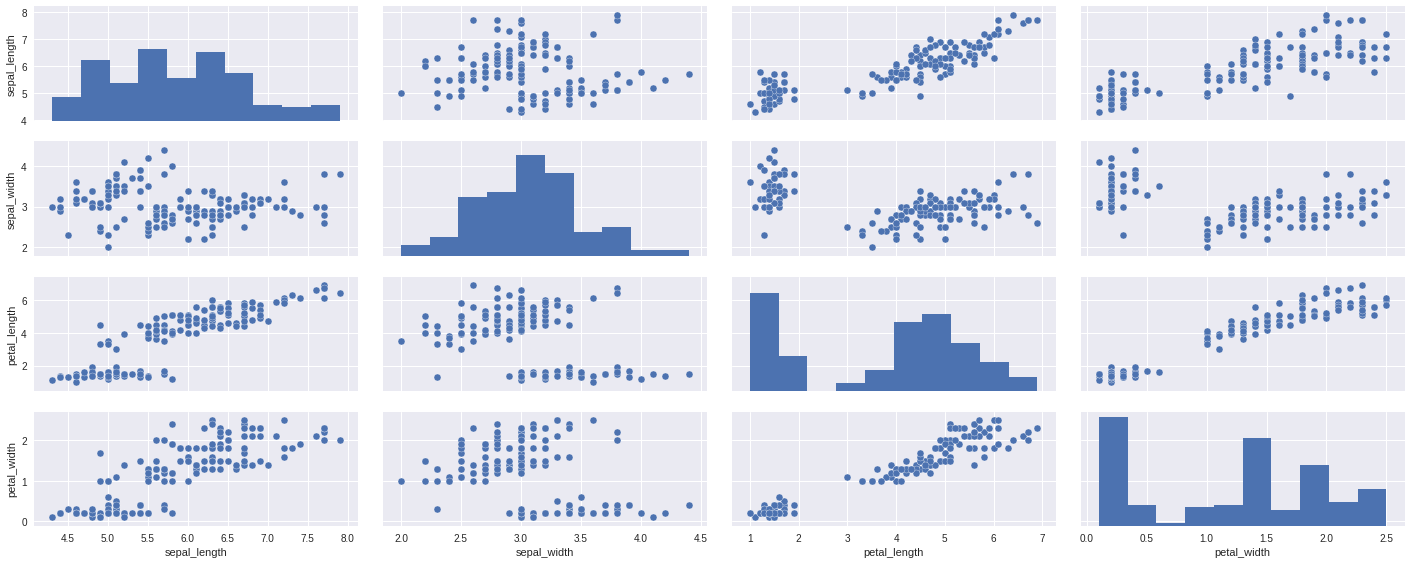

In [52]:
plt.figure(1, (20,10))

sns.pairplot(iris_df, size=2, aspect=2.5)

Having a look at the pair plot, we might say that we are able to predict petal width if we know petal length.

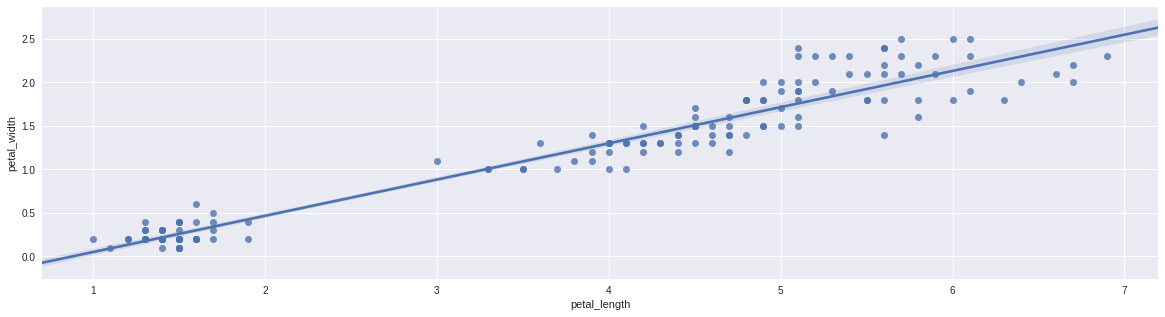

In [53]:
plt.figure(1, (20,5))

sns.regplot('petal_length', 'petal_width', data=iris_df)

## Linear Regression

We might build a **simple regression model** to do this for us using scikit-learn. Here, the **input variable** would be `petal length` and the **output variable** would be `petal width`.

We will usually refer to our input variable(s) as **feature(s)** and our output variable as the **target**.

### Build a Simple Regression Model

In [54]:
from patsy import dmatrices

target, features = dmatrices("petal_width ~ petal_length", iris_df)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Plot the Results

Having prepared the regression model, we use it to make predictions.

We then plot the predictions versus the actual values.


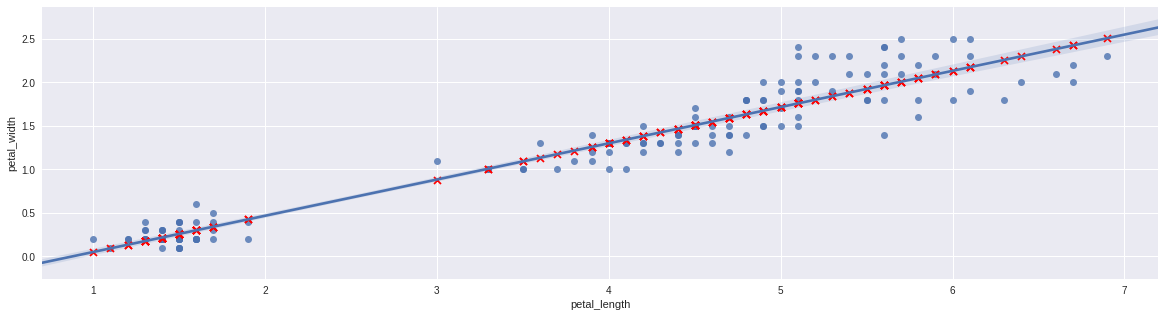

In [57]:
plt.figure(1, (20,5))

sns.regplot('petal_length', 'petal_width', data=iris_df)

predictions = linear_regression_model.predict(features)
plt.scatter(iris_df.petal_length, predictions, marker='x', color='red')

### What does this plot show us? 

This plot is showing us that if we inpt a petal length of x size, then we might see a petal width of y (the red X's alongth the linear fit curve)